## Dependencias

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


## Generación de datos sintéticos

In [28]:
X,y = make_blobs(100,2,centers=2,cluster_std=16)

### Conjunto de entrenamiento $S_n = \{(x^{(i)},y^{(i)}),i=1,\ldots,n\}$

In [29]:
Sn = pd.DataFrame(X,columns=['x1','x2'])
Sn['y'] = y

In [30]:
Sn.head()

,x1,x2,y
0,-10.121470,12.397869,0
1,7.476957,12.559126,1
2,5.336937,11.490639,0
3,-0.741937,-6.379403,1
4,-5.225521,33.857807,0


### Visualización de los datos

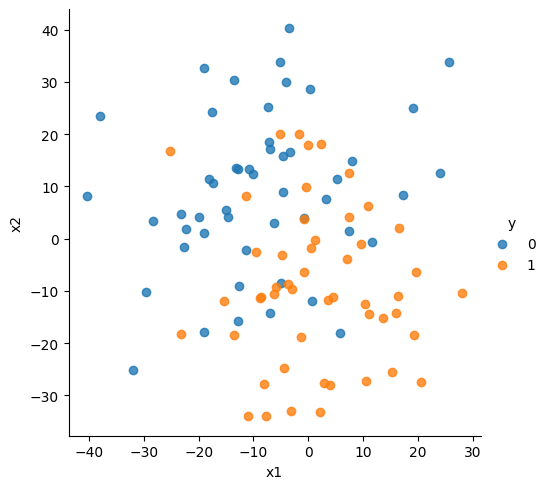

In [31]:
sns.lmplot(data=Sn,x='x1',y='x2',hue='y',fit_reg=False)

## Pasivo-Agresivo

In [32]:
pa = PassiveAggressiveClassifier(C=0.1)
pa.fit(X,y)


PassiveAggressiveClassifier(C=0.1)

### Parámetros del modelo

In [33]:
pa.coef_,pa.intercept_

(array([[ 0.27916238, -0.01552782]]), array([0.59037945]))

### Graficamos la recta de separación

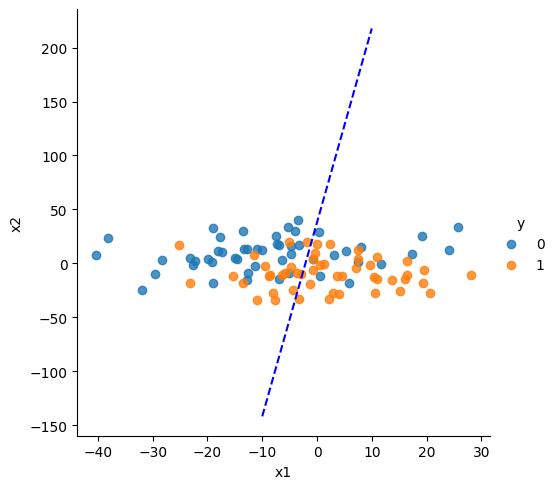

In [34]:
theta,theta0 = pa.coef_[0],pa.intercept_[0]
sns.lmplot(data=Sn,x='x1',y='x2',hue='y',fit_reg=False)
x1 = np.linspace(-10,10,100)
x2 = (-theta0-theta[0]*x1)/theta[1]
plt.plot(x1,x2,linestyle='--',color='blue')

## SVM

In [35]:
svc = SVC(C=0.1,kernel='linear')
svc.fit(X,y)

SVC(C=0.1, kernel='linear')

In [36]:
svc.intercept_,svc.coef_

(array([0.34348946]), array([[ 0.05428987, -0.07012906]]))

### Gráfica de la frontera de decisión

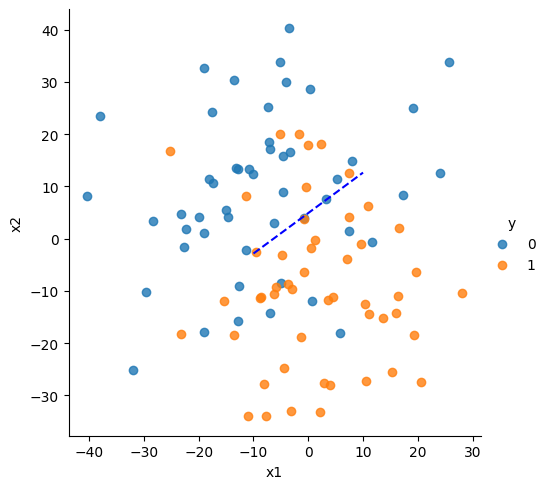

In [37]:
theta,theta0 = svc.coef_[0],svc.intercept_[0]
sns.lmplot(data=Sn,x='x1',y='x2',hue='y',fit_reg=False)
x1 = np.linspace(-10,10,100)
x2 = (-theta0-theta[0]*x1)/theta[1]
plt.plot(x1,x2,linestyle='--',color='blue')

## Métricas de evaluación

In [41]:
print({"pa":accuracy_score(y,pa.predict(X))})
print({"svc":accuracy_score(y,svc.predict(X))})


{'pa': 0.68}
{'svc': 0.79}
